# Import necessary libraries

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

Init Plugin
Init Graph Optimizer
Init Kernel


## Configuring with GPU

In [2]:
DISABLE_GPU = False

if DISABLE_GPU:
    try:
        # Disable all GPUS
        tf.config.set_visible_devices([], 'GPU')
        visible_devices = tf.config.get_visible_devices()
        for device in visible_devices:
            assert device.device_type != 'GPU'
    except:
        # Invalid device or cannot modify virtual devices once initialized.
        pass

print(tf.__version__)

2.5.0


## Builining Model

In [3]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Metal device set to: Apple M1 Pro
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)         

2022-04-08 00:32:34.884479: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-04-08 00:32:34.884678: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Prepare Training Data

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Trainig model using small batch (16) -> slower

In [5]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, 
          train_labels, 
          epochs=5, 
          batch_size=16)

2022-04-08 00:32:35.230593: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-04-08 00:32:35.232409: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-04-08 00:32:35.402492: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Epoch 1/5
3750/3750 [==============================] - 35s 9ms/step - loss: 0.1219 - accuracy: 0.9614
Epoch 2/5
3750/3750 [==============================] - 34s 9ms/step - loss: 0.0460 - accuracy: 0.9868
Epoch 3/5
3750/3750 [==============================] - 34s 9ms/step - loss: 0.0361 - accuracy: 0.9901
Epoch 4/5
3750/3750 [==============================] - 34s 9ms/step - loss: 0.0314 - accuracy: 0.9915
Epoch 5/5
3750/3750 [==============================] - 34s 9ms/step - loss: 0.0280 - accuracy: 0.9931


## Trainig model using medium batch (64) -> little faster

In [6]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, 
          train_labels, 
          epochs=5, 
          batch_size=64)

Epoch 1/5
  3/938 [..............................] - ETA: 25s - loss: 0.0099 - accuracy: 0.9948     

2022-04-08 00:35:25.142459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


938/938 [==============================] - 9s 10ms/step - loss: 0.0179 - accuracy: 0.9949
Epoch 2/5
938/938 [==============================] - 9s 9ms/step - loss: 0.0134 - accuracy: 0.9963
Epoch 3/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0106 - accuracy: 0.9971
Epoch 4/5
938/938 [==============================] - 9s 9ms/step - loss: 0.0088 - accuracy: 0.9976
Epoch 5/5
938/938 [==============================] - 9s 10ms/step - loss: 0.0083 - accuracy: 0.9976


## Trainig model using small batch (256) -> faster

In [7]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(train_images, 
          train_labels, 
          epochs=5, 
          batch_size=256)

Epoch 1/5
  4/235 [..............................] - ETA: 3s - loss: 8.6468e-04 - accuracy: 1.0000  

2022-04-08 00:36:09.952636: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


235/235 [==============================] - 3s 14ms/step - loss: 0.0041 - accuracy: 0.9989
Epoch 2/5
235/235 [==============================] - 3s 13ms/step - loss: 0.0027 - accuracy: 0.9992
Epoch 3/5
235/235 [==============================] - 3s 13ms/step - loss: 0.0018 - accuracy: 0.9994
Epoch 4/5
235/235 [==============================] - 3s 13ms/step - loss: 0.0014 - accuracy: 0.9995
Epoch 5/5
235/235 [==============================] - 3s 13ms/step - loss: 0.0015 - accuracy: 0.9995


## Model Evaluation

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

 29/313 [=>............................] - ETA: 1s - loss: 0.0361 - accuracy: 0.9925 

2022-04-08 00:36:25.939192: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 6ms/step - loss: 0.0497 - accuracy: 0.9920


0.9920000433921814

## Save Model

In [9]:
model.save('MNIST.h5')

## Test

/opt/homebrew/Caskroom/miniforge/base/envs/tf_gpu/lib/python3.9/site-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
2022-04-08 00:37:25.274606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


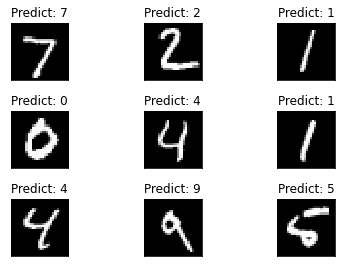

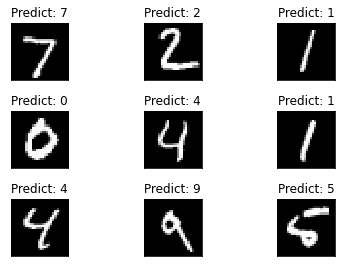

In [12]:
from matplotlib import pyplot as plt
import numpy as np

fig = plt.figure()
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(test_images[i], cmap='gray', interpolation='none')
    img = np.expand_dims(test_images[i], axis=0)
    plt.title("Predict: {}".format(model.predict_classes(img)[0]))
    plt.xticks([])
    plt.yticks([])
fig